<a href="https://colab.research.google.com/github/doug8008/elec380/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Need numpy 1.14!!!
import matplotlib.pyplot as plt
import scipy.signal as signal

In [ ]:
subject_6_data = np.load('subject_06.npz')

eeg_data = subject_6_data['eeg_data']
fs = int(subject_6_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices = subject_6_data['eyes_closed_indices']
eyes_opened_indices = subject_6_data['eyes_opened_indices']
channel_labels = subject_6_data['channel_labels']

t_eeg = np.arange(eeg_data.shape[0])/fs # make timestamps based on sampling rate

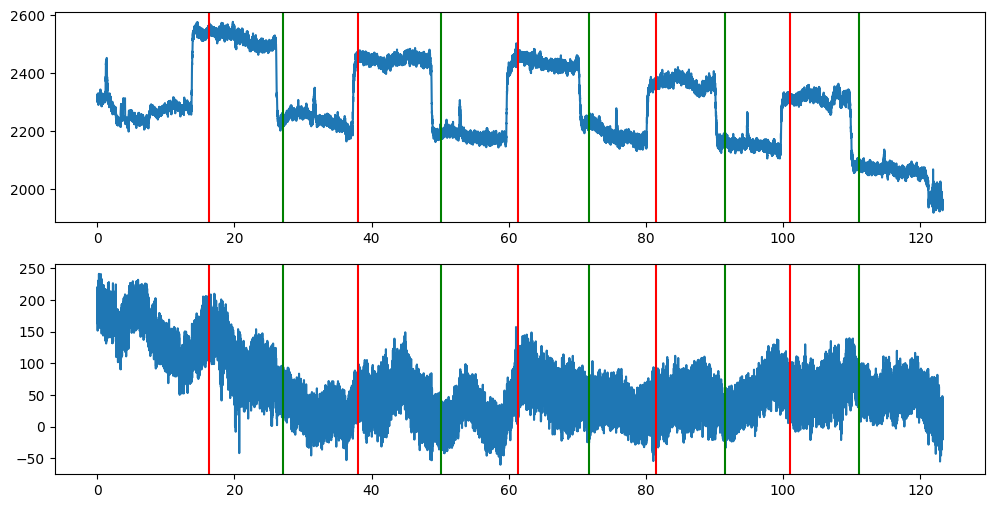

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,6))

t = np.arange(eeg_data.shape[0])/fs # Time axis data starts at time 0 and goes to the end with 1/sampling-rate time steps

ax[0].plot(t, eeg_data[:,0]) # Plot channel 0 (Fp1)
ax[1].plot(t, eeg_data[:,13]) # Plot channel 13 (O1)

# Plot the moments when the eyes closed and the eyes opened according to the experimenter
for a in ax:
    for closed in eyes_closed_indices:
        a.axvline(t[closed], color='r')
    for opened in eyes_opened_indices:
        a.axvline(t[opened], color='g')

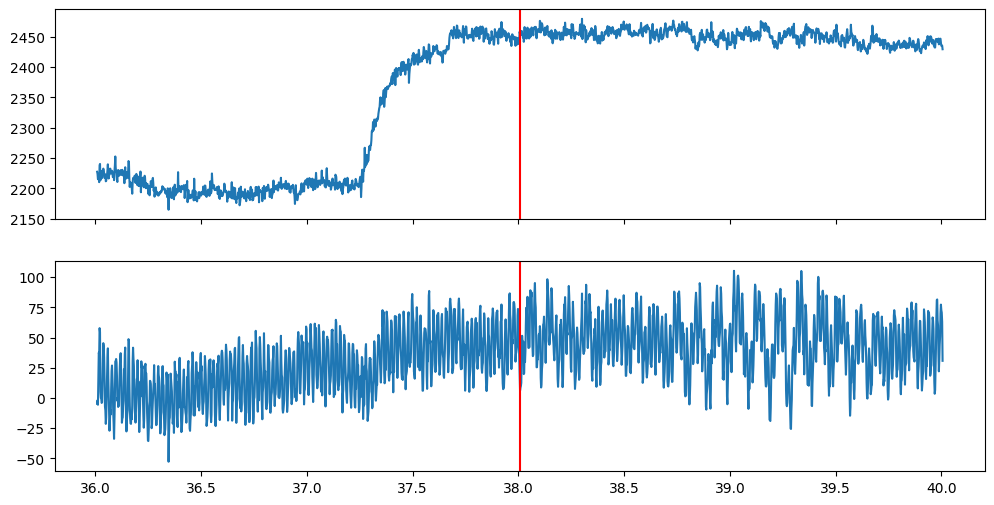

In [ ]:
closed_index = eyes_closed_indices[1,0] # Index of second eyes closing index

fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

ax[0].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 0])
ax[1].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 13])
ax[0].axvline(t[closed_index], color='r')
ax[1].axvline(t[closed_index], color='r')

Problem 1

In [ ]:
eyes_closed_signals = []
eyes_opened_signals = []
window_indices = np.arange(4*fs) + 4*fs # Indices will be a vector of 4 s of samples start 4 s after index

for closed in eyes_closed_indices:
    eyes_closed_signals.append(eeg_data[closed + window_indices,:])

for opened in eyes_opened_indices:
    eyes_opened_signals.append(eeg_data[opened + window_indices,:])

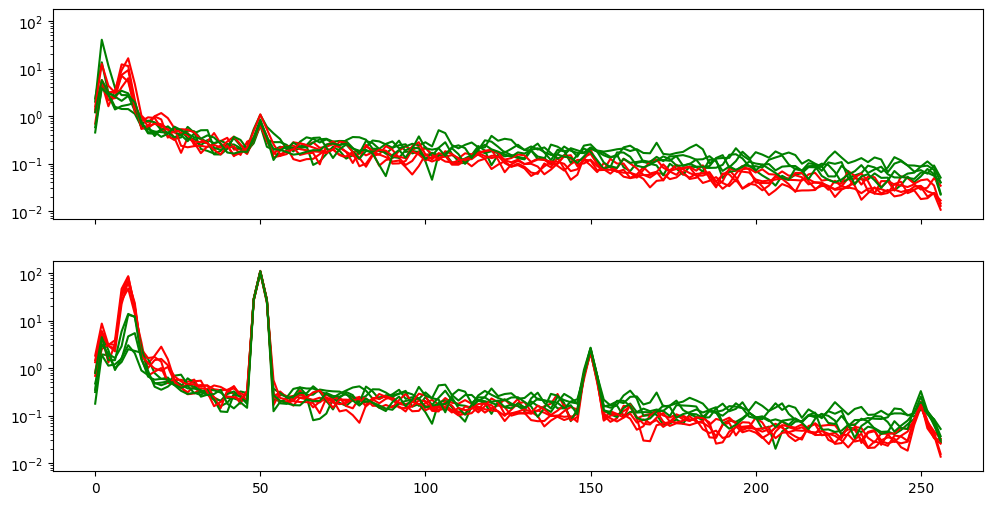

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)

for i in range(5):
    # Calculate and plot the PSDs for channel 0
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=256)
    ax[0].semilogy(f,Pxx, 'r')
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=256)
    ax[0].semilogy(f,Pxx, 'g')

    # Calculate and plot the PSDs for channel 13
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=256)
    ax[1].semilogy(f,Pxx, 'r')
    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=256)
    ax[1].semilogy(f,Pxx, 'g')

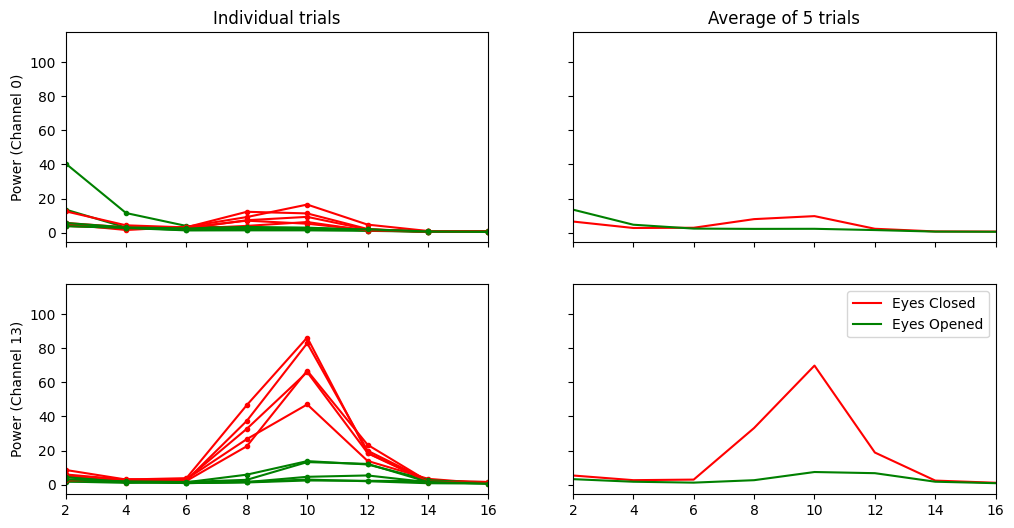

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)

nperseg = 256

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 0
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'r.-')
    eyes_closed_Pxx.append(Pxx)
    f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
    ax[0,0].plot(f,Pxx, 'g.-')
    eyes_opened_Pxx.append(Pxx)

ax[0,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r')
ax[0,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g')

eyes_closed_Pxx = []
eyes_opened_Pxx = []
# Calculate and plot the PSDs for channel 13
for i in range(5):
    f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
    eyes_closed_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'r.-')

    f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
    eyes_opened_Pxx.append(Pxx)
    ax[1,0].plot(f,Pxx, 'g.-')

ax[1,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
ax[1,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

ax[0,0].set_title('Individual trials')
ax[0,1].set_title('Average of 5 trials')
ax[0,0].set_ylabel('Power (Channel 0)')
ax[1,0].set_ylabel('Power (Channel 13)')
ax[0,0].set_xlim(2,16)
ax[1,1].legend()


Channel 13 has the highest change in alpha power from eyes open to eyes closed (seen visually from an average power <20 to ~80) vs. channel 0 where power stayed between 10 and 20 for both open and closed)

Problem 1a:  What frequency is the alpha rhythm for this subject?

(The Welch PSD method averages the results of smaller, overlapping windows (with size set by the nperseg parameter. This results in less noisy estimates, but lower frequency resolution (shorter window <-> lower frequency resolution). Try different values of the nperseg parameter and see if that changes your answer.)


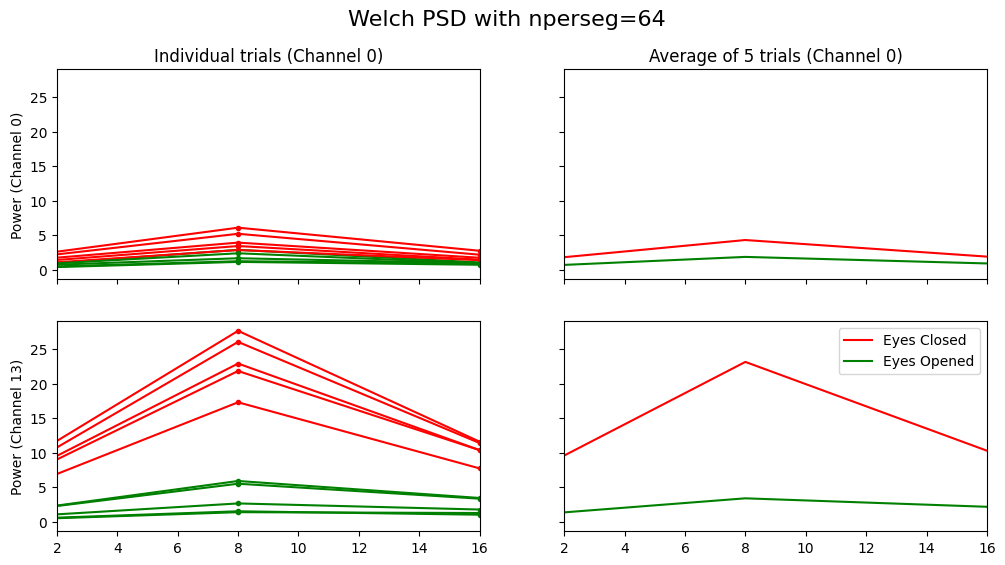

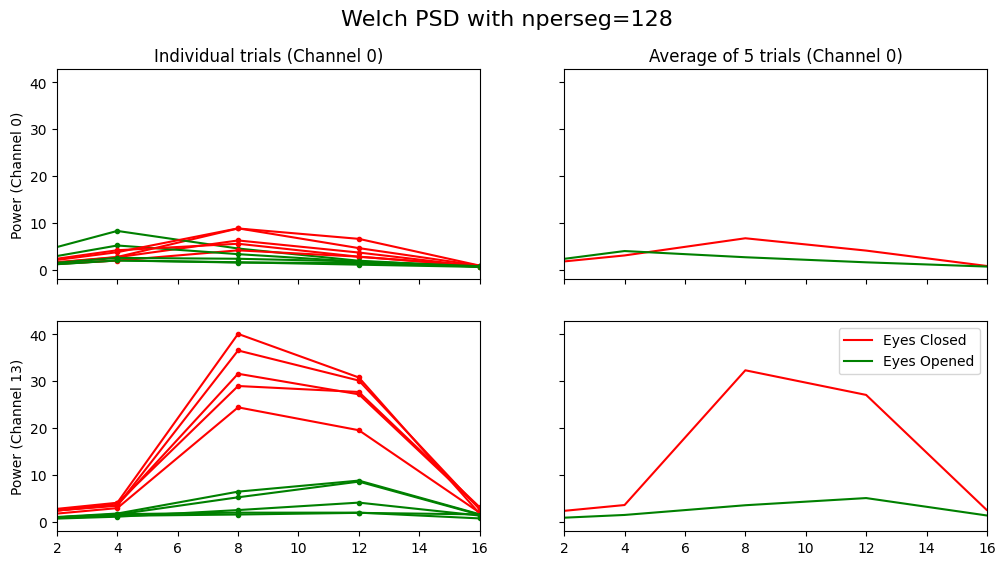

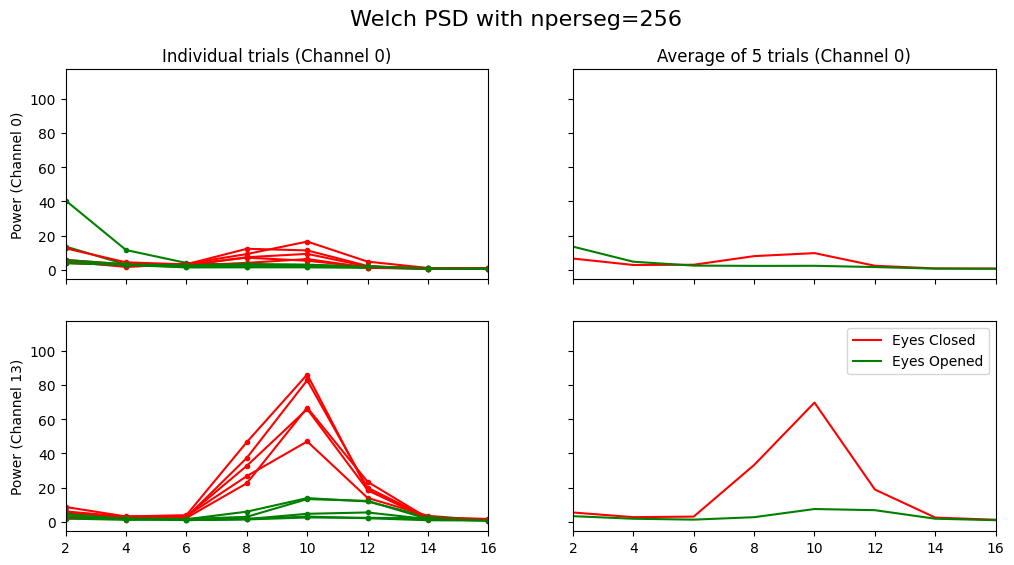

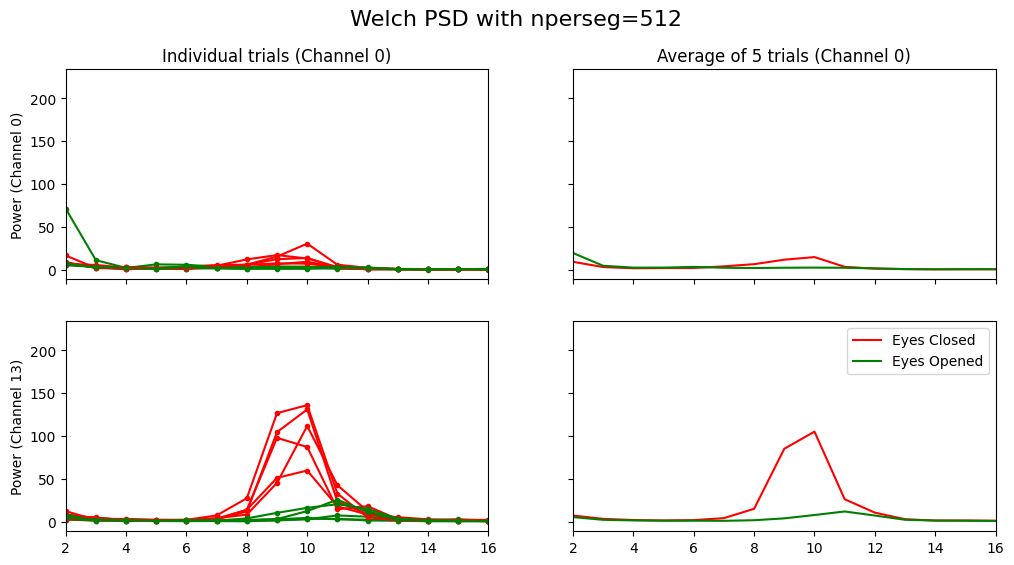

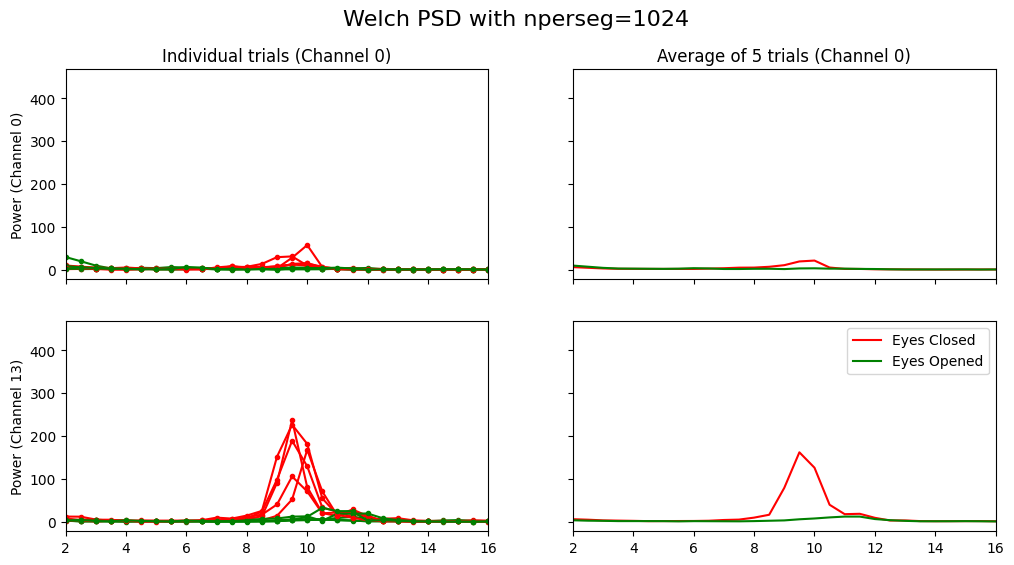

In [ ]:
# Try npserg values
nperseg_values = [64, 128, 256, 512, 1024]

# Loop for different nperseg values
for nperseg in nperseg_values:
    fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)
    fig.suptitle(f'Welch PSD with nperseg={nperseg}', fontsize=16)

    eyes_closed_Pxx = []
    eyes_opened_Pxx = []

# Calculate and plot the PSDs for channel 0
    for i in range(5):
        f, Pxx = signal.welch(eyes_closed_signals[i][:,0], fs, nperseg=nperseg)
        ax[0,0].plot(f, Pxx, 'r.-')
        eyes_closed_Pxx.append(Pxx)

        f, Pxx = signal.welch(eyes_opened_signals[i][:,0], fs, nperseg=nperseg)
        ax[0,0].plot(f, Pxx, 'g.-')
        eyes_opened_Pxx.append(Pxx)

    ax[0,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
    ax[0,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')

# Reset for channel 13
    eyes_closed_Pxx = []
    eyes_opened_Pxx = []

# Calculate and plot the PSDs for channel 0
    for i in range(5):
        f, Pxx = signal.welch(eyes_closed_signals[i][:,13], fs, nperseg=nperseg)
        ax[1,0].plot(f, Pxx, 'r.-')
        eyes_closed_Pxx.append(Pxx)

        f, Pxx = signal.welch(eyes_opened_signals[i][:,13], fs, nperseg=nperseg)
        ax[1,0].plot(f, Pxx, 'g.-')
        eyes_opened_Pxx.append(Pxx)

    ax[1,1].plot(f, np.mean(eyes_closed_Pxx, axis=0), 'r', label='Eyes Closed')
    ax[1,1].plot(f, np.mean(eyes_opened_Pxx, axis=0), 'g', label='Eyes Opened')


    ax[0,0].set_title('Individual trials (Channel 0)')
    ax[0,1].set_title('Average of 5 trials (Channel 0)')
    ax[0,0].set_ylabel('Power (Channel 0)')
    ax[1,0].set_ylabel('Power (Channel 13)')
    ax[0,0].set_xlim(2,16)  # Focus on relevant frequency range (2-16 Hz)
    ax[1,1].legend()

The frequency of the alpha rhythym for subject 12 is around 9-10 hz, ~9.7 (the x axis), we see this as we increase the nperseg values (increasing the frequency resolution).

Problem 1b: What channel shows the largest average alpha signal when eyes are closed? Which shows the largest difference between eyes opened and eyes closed?

In [ ]:
def extract_alpha_power(eeg_channel=0, frequency=9.7, nperseg=1024, window_size=4.0, window_offset=4.0):
    eyes_closed_signals = []
    eyes_opened_signals = []
    window_indices = np.arange(int(window_size*fs)) + int(window_offset*fs)

    for closed in eyes_closed_indices:
        eyes_closed_signals.append(eeg_data[closed + window_indices, :])

    for opened in eyes_opened_indices:
        eyes_opened_signals.append(eeg_data[opened + window_indices, :])

    f, eyes_closed_Pxx = signal.welch(eyes_closed_signals, fs, axis=1, nperseg=nperseg)
    f, eyes_opened_Pxx = signal.welch(eyes_opened_signals, fs, axis=1, nperseg=nperseg)

    fidx = np.abs(f - frequency).argmin()
    print('Using frequency {} Hz ({} specified).'.format(f[fidx], frequency))

    return np.mean(eyes_closed_Pxx[:, fidx, eeg_channel], axis=0), np.mean(eyes_opened_Pxx[:, fidx, eeg_channel], axis=0)


Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).
Using frequency 9.5 Hz (9.7 specified).


Text(0, 0.5, 'Power Ratio')

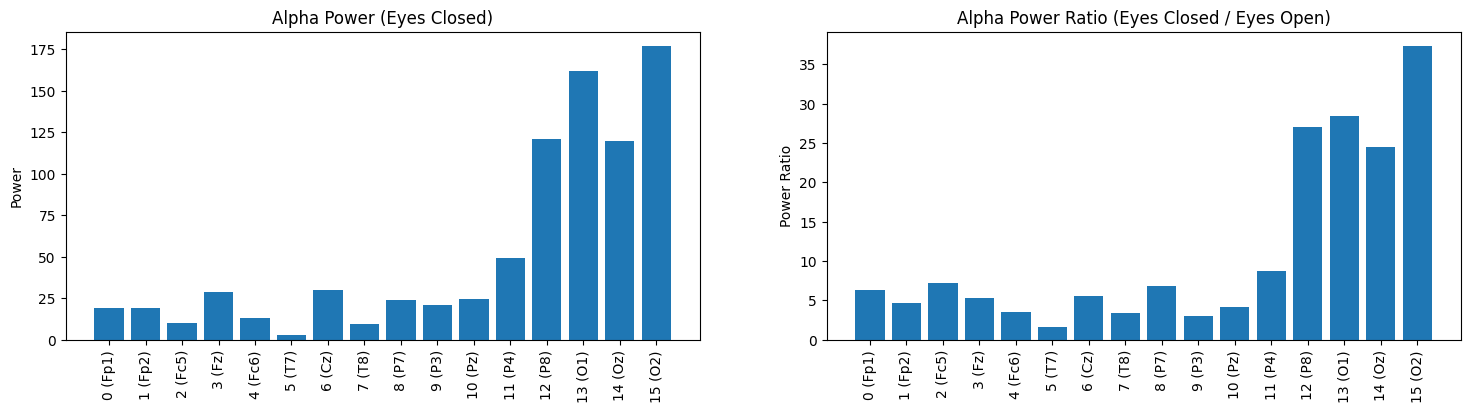

In [ ]:
alpha_power = []
alpha_power_ratio = []

# Loop through all 16 EEG channels
for ch in range(16):
    eyes_closed_power, eyes_opened_power = extract_alpha_power(eeg_channel=ch, frequency=9.7, nperseg=1024)
    alpha_power.append(eyes_closed_power)
    alpha_power_ratio.append(eyes_closed_power / eyes_opened_power)

# Plotting code
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_labels = ['{} ({})'.format(ind, lab) for ind, lab in enumerate(channel_labels)]

# Plot Alpha Power (Eyes Closed)
ax[0].bar(plot_labels, alpha_power)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed)')
ax[0].set_ylabel('Power')

# Plot Alpha Power Ratio (Eyes Closed to Eyes Open)
ax[1].bar(plot_labels, alpha_power_ratio)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power Ratio (Eyes Closed / Eyes Open)')
ax[1].set_ylabel('Power Ratio')



**1b answer**: With nperseg 1024, Channel 15 (O2) has the highest eyes closed alpha power (>170), among other values (512, 206). Channel 12 (P8) has the highest alpha power ratio (~10) at nperseg 206, but with the increased nperseg value determined to be a better fit, channel 15 (O2) also has the highest power ration (>35)

**Problem 1C:** Which channel has the most noise?

Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).
Using frequency 50.0 Hz (50 specified).


Text(0, 0.5, 'Power')

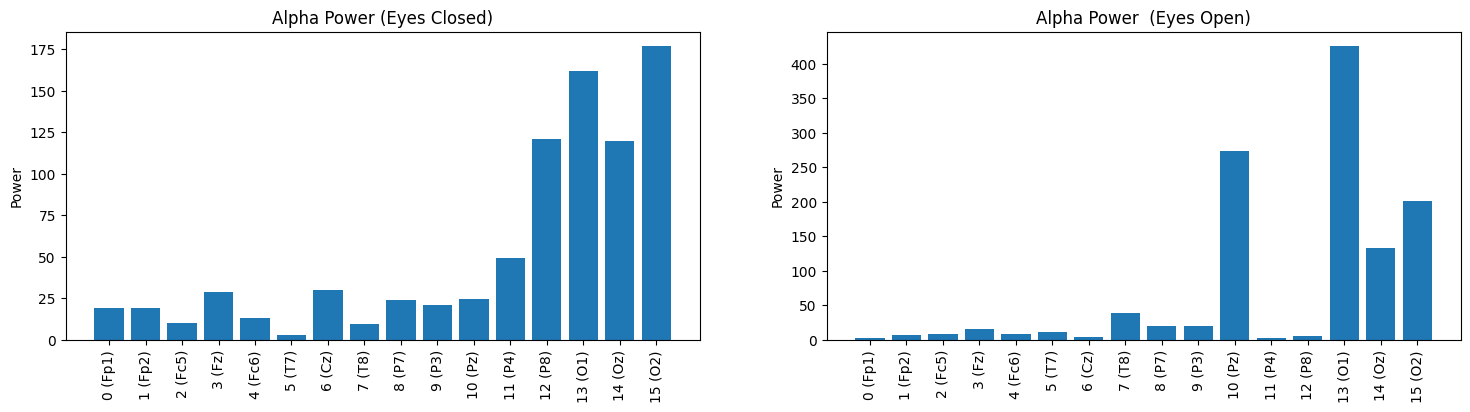

In [ ]:
def extract_alpha_power(eeg_channel=0, frequency=9.7, nperseg=1024, window_size=4.0, window_offset=4.0):
    eyes_closed_signals = []
    eyes_opened_signals = []
    window_indices = np.arange(int(window_size*fs)) + int(window_offset*fs)

    for closed in eyes_closed_indices:
        eyes_closed_signals.append(eeg_data[closed + window_indices, :])

    for opened in eyes_opened_indices:
        eyes_opened_signals.append(eeg_data[opened + window_indices, :])

    f, eyes_closed_Pxx = signal.welch(eyes_closed_signals, fs, axis=1, nperseg=nperseg)
    f, eyes_opened_Pxx = signal.welch(eyes_opened_signals, fs, axis=1, nperseg=nperseg)

    fidx = np.abs(f - frequency).argmin()
    print('Using frequency {} Hz ({} specified).'.format(f[fidx], frequency))

    return np.mean(eyes_closed_Pxx[:, fidx, eeg_channel], axis=0), np.mean(eyes_opened_Pxx[:, fidx, eeg_channel], axis=0)


alpha_power_close = []
alpha_power_open = []

# Loop through all 16 EEG channels
for ch in range(16):
    eyes_closed_power, eyes_opened_power = extract_alpha_power(eeg_channel=ch, frequency=50, nperseg=1024)
    alpha_power_close.append(eyes_closed_power)
    alpha_power_open.append(eyes_opened_power)

# Plotting code
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_labels = ['{} ({})'.format(ind, lab) for ind, lab in enumerate(channel_labels)]

# Plot Alpha Power (Eyes Closed)
ax[0].bar(plot_labels, alpha_power)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed)')
ax[0].set_ylabel('Power')

# Plot Alpha Power Open
ax[1].bar(plot_labels, alpha_power_open)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power  (Eyes Open)')
ax[1].set_ylabel('Power')



Channel 13 has the most line noise at 50 Hz; this is shown wiht the highest alpha power at channel 13, regardless of eyes open/closed.


Problem 2: Calculating a Fourier-Based Spectrum

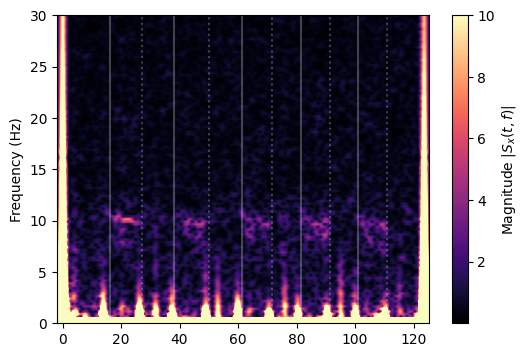

In [ ]:
hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
im = ax.imshow((abs(stft[:,0,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")
ax.set_ylabel('Frequency (Hz)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
[ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

Problem 2A: Spectrogram of Alpha


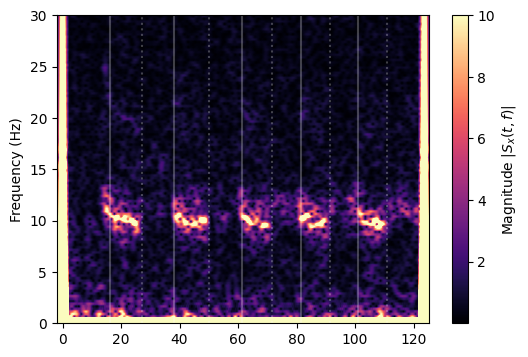

In [ ]:
hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
#use channel 15
im = ax.imshow((abs(stft[:,15,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")
ax.set_ylabel('Frequency (Hz)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
[ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

Yes, it sweeps downward for subject 6

Problem 2B: Does the frequency of Alpha sweep?


In [ ]:
#subject 8

subject_8_data = np.load('subject_08.npz')

eeg_data_8 = subject_8_data['eeg_data']
fs = int(subject_8_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices8 = subject_8_data['eyes_closed_indices']
eyes_opened_indices8 = subject_8_data['eyes_opened_indices']
channel_labels8 = subject_8_data['channel_labels']

t_eeg_8 = np.arange(eeg_data_8.shape[0])/fs # make timestamps based on sampling rate


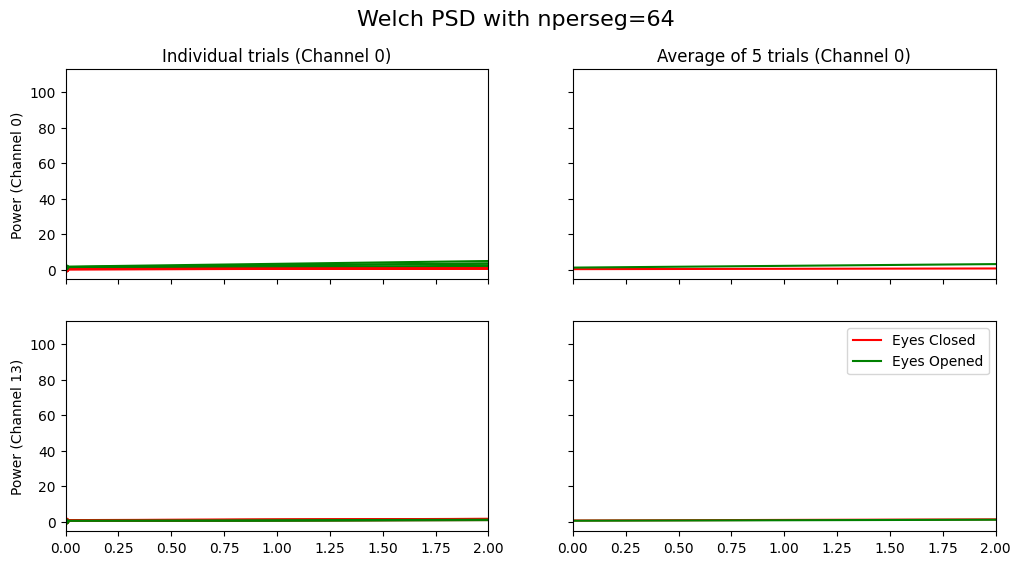

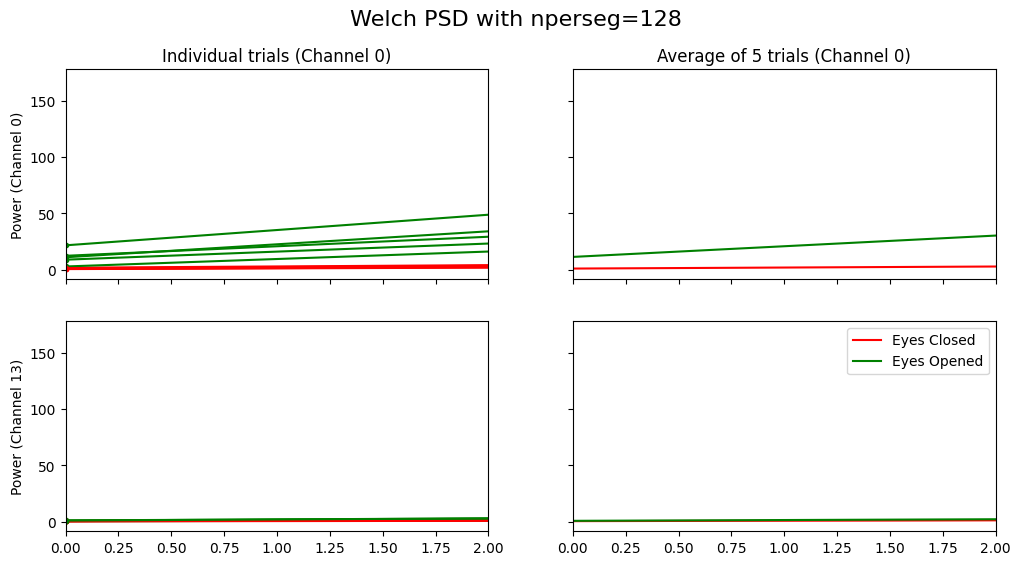

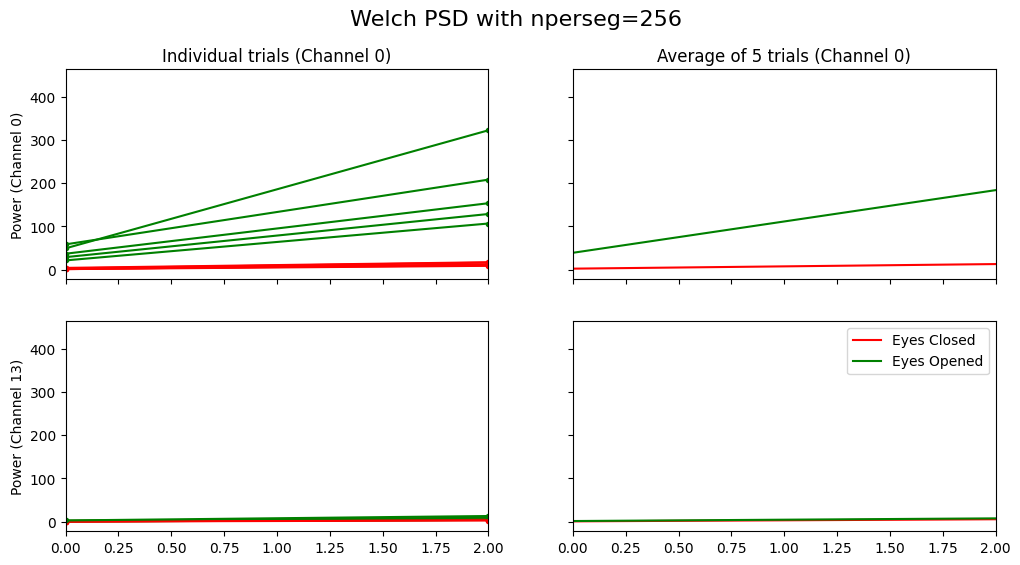

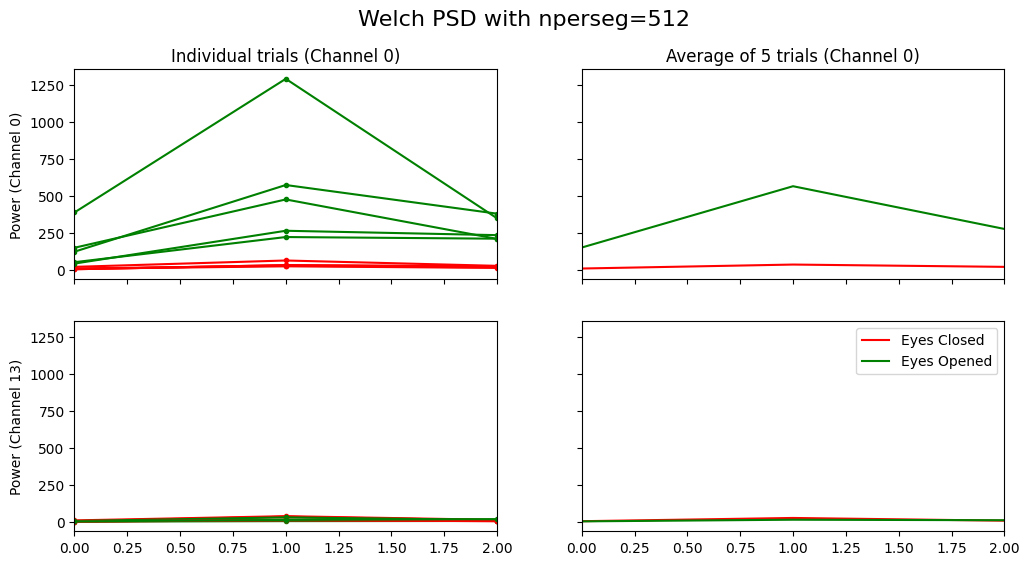

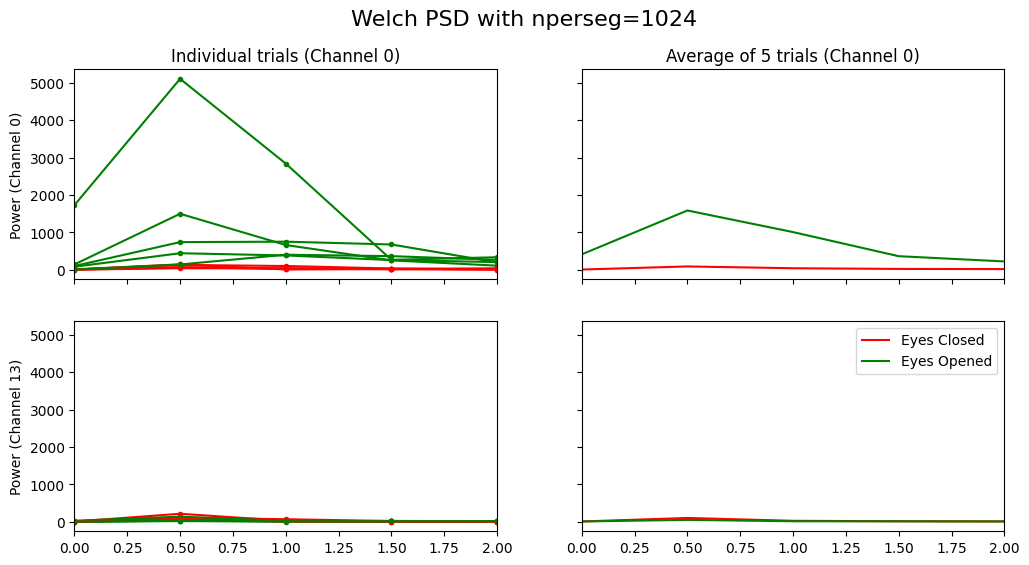

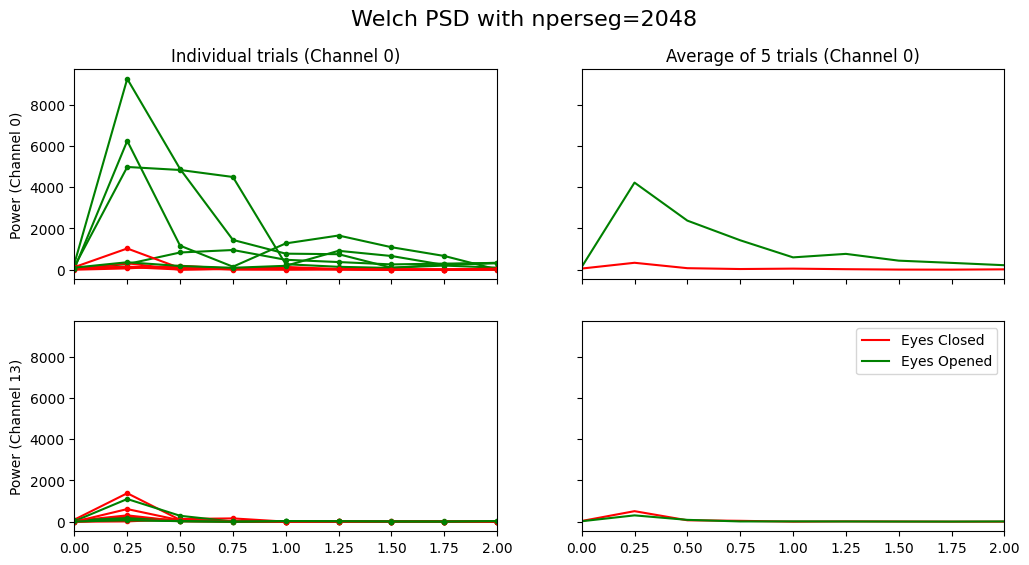

In [ ]:
### now find alpha frequency
eyes_closed_signals8 = []
eyes_opened_signals8 = []
window_indices8 = np.arange(4*fs) + 4*fs # Indices will be a vector of 4 s of samples start 4 s after index

for closed8 in eyes_closed_indices8:
    eyes_closed_signals8.append(eeg_data_8[closed8 + window_indices8,:])

for opened8 in eyes_opened_indices8:
    eyes_opened_signals8.append(eeg_data_8[opened8 + window_indices8,:])

# Try npserg values
nperseg_values = [64, 128, 256, 512, 1024,2048]

# Loop for different nperseg values
for nperseg in nperseg_values:
    fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)
    fig.suptitle(f'Welch PSD with nperseg={nperseg}', fontsize=16)

    eyes_closed_Pxx8 = []
    eyes_opened_Pxx8 = []

# Calculate and plot the PSDs for channel 0
    for i in range(5):
        f8, Pxx8 = signal.welch(eyes_closed_signals8[i][:,0], fs, nperseg=nperseg)
        ax[0,0].plot(f8, Pxx8, 'r.-')
        eyes_closed_Pxx8.append(Pxx8)

        f8, Pxx8 = signal.welch(eyes_opened_signals8[i][:,0], fs, nperseg=nperseg)
        ax[0,0].plot(f8, Pxx8, 'g.-')
        eyes_opened_Pxx8.append(Pxx8)

    ax[0,1].plot(f8, np.mean(eyes_closed_Pxx8, axis=0), 'r', label='Eyes Closed')
    ax[0,1].plot(f8, np.mean(eyes_opened_Pxx8, axis=0), 'g', label='Eyes Opened')

# Reset for channel 13
    eyes_closed_Pxx8 = []
    eyes_opened_Pxx8 = []

# Calculate and plot the PSDs for channel 0
    for i in range(5):
        f8, Pxx8 = signal.welch(eyes_closed_signals8[i][:,13], fs, nperseg=nperseg)
        ax[1,0].plot(f8, Pxx8, 'r.-')
        eyes_closed_Pxx8.append(Pxx8)

        f8, Pxx8 = signal.welch(eyes_opened_signals8[i][:,13], fs, nperseg=nperseg)
        ax[1,0].plot(f8, Pxx8, 'g.-')
        eyes_opened_Pxx8.append(Pxx8)

    ax[1,1].plot(f8, np.mean(eyes_closed_Pxx8, axis=0), 'r', label='Eyes Closed')
    ax[1,1].plot(f8, np.mean(eyes_opened_Pxx8, axis=0), 'g', label='Eyes Opened')


    ax[0,0].set_title('Individual trials (Channel 0)')
    ax[0,1].set_title('Average of 5 trials (Channel 0)')
    ax[0,0].set_ylabel('Power (Channel 0)')
    ax[1,0].set_ylabel('Power (Channel 13)')
    ax[0,0].set_xlim(0,2)  # had to narrow frequency range
    ax[1,1].legend()



Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).
Using frequency 0.5 Hz (0.25 specified).


Text(0, 0.5, 'Power Ratio')

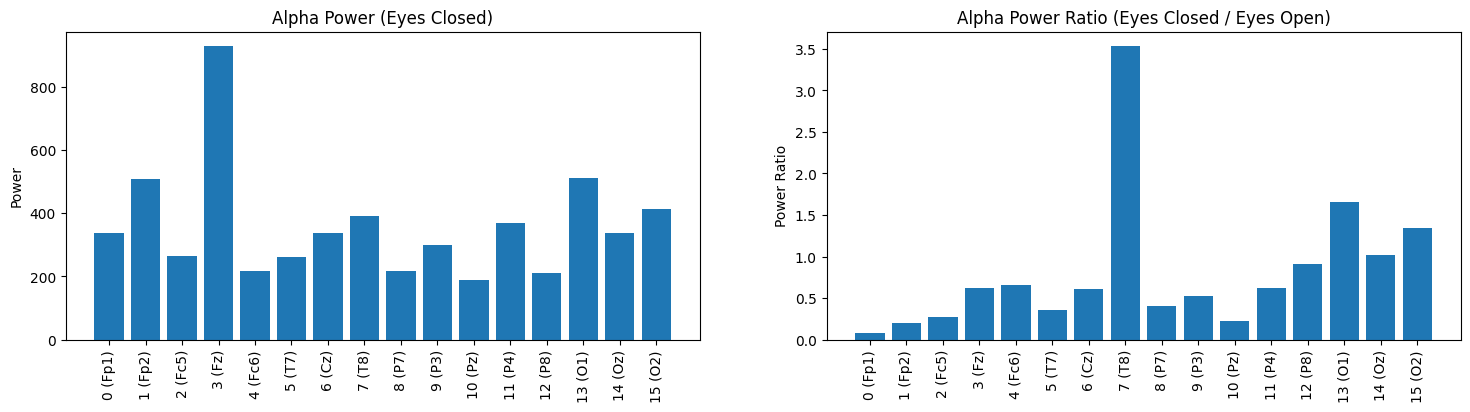

In [ ]:
def extract_alpha_power8(eeg_channel=0, frequency=.25, nperseg=2048, window_size=4.0, window_offset=4.0):
    eyes_closed_signals8 = []
    eyes_opened_signals8 = []
    window_indices8 = np.arange(int(window_size*fs)) + int(window_offset*fs)

    for closed8 in eyes_closed_indices8:
        eyes_closed_signals8.append(eeg_data_8[closed8 + window_indices, :])

    for opened8 in eyes_opened_indices8:
        eyes_opened_signals8.append(eeg_data_8[opened8 + window_indices, :])

    f8, eyes_closed_Pxx8 = signal.welch(eyes_closed_signals8, fs, axis=1, nperseg=nperseg)
    f8, eyes_opened_Pxx8 = signal.welch(eyes_opened_signals8, fs, axis=1, nperseg=nperseg)

    fidx = np.abs(f8 - frequency).argmin()
    print('Using frequency {} Hz ({} specified).'.format(f[fidx], frequency))

    return np.mean(eyes_closed_Pxx8[:, fidx, eeg_channel], axis=0), np.mean(eyes_opened_Pxx8[:, fidx, eeg_channel], axis=0)

alpha_power8 = []
alpha_power_ratio8 = []

# Loop through all 16 EEG channels
for ch in range(16):
    eyes_closed_power8, eyes_opened_power8 = extract_alpha_power8(eeg_channel=ch, frequency=.25, nperseg=2048)
    alpha_power8.append(eyes_closed_power8)
    alpha_power_ratio8.append(eyes_closed_power8 / eyes_opened_power8)

# Plotting code
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_labels8 = ['{} ({})'.format(ind, lab) for ind, lab in enumerate(channel_labels8)]

# Plot Alpha Power (Eyes Closed)
ax[0].bar(plot_labels8, alpha_power8)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed)')
ax[0].set_ylabel('Power')

# Plot Alpha Power Ratio (Eyes Closed to Eyes Open)
ax[1].bar(plot_labels8, alpha_power_ratio8)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power Ratio (Eyes Closed / Eyes Open)')
ax[1].set_ylabel('Power Ratio')

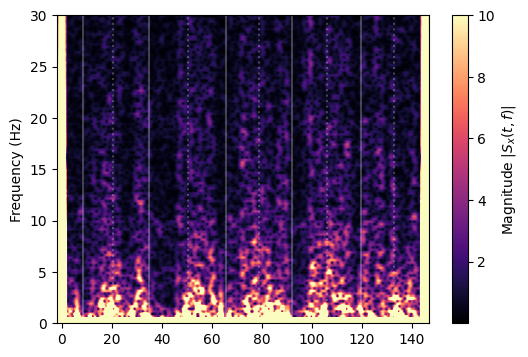

In [ ]:
#spectrogram

hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data_8, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
#use channel 3
im = ax.imshow((abs(stft[:,3,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data_8.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")
ax.set_ylabel('Frequency (Hz)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg_8[idx], color='white', alpha=0.25) for idx in eyes_closed_indices8]
[ax.axvline(t_eeg_8[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices8]


Subject 8 does not have an alpha sweep.

In [ ]:
#subject 12

subject_12_data = np.load('subject_12.npz')

eeg_data12 = subject_12_data['eeg_data']
fs = int(subject_12_data['fs']) # Sampling rate of EEG (512 Hz)
eyes_closed_indices12 = subject_12_data['eyes_closed_indices']
eyes_opened_indices12 = subject_12_data['eyes_opened_indices']
channel_labels12 = subject_12_data['channel_labels']

t_eeg12 = np.arange(eeg_data12.shape[0])/fs # make timestamps based on sampling rate


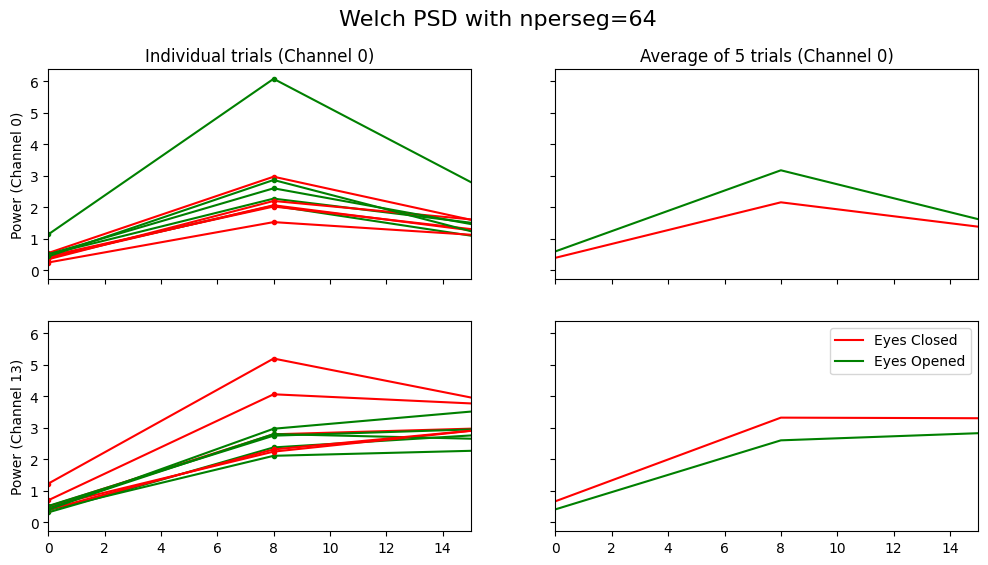

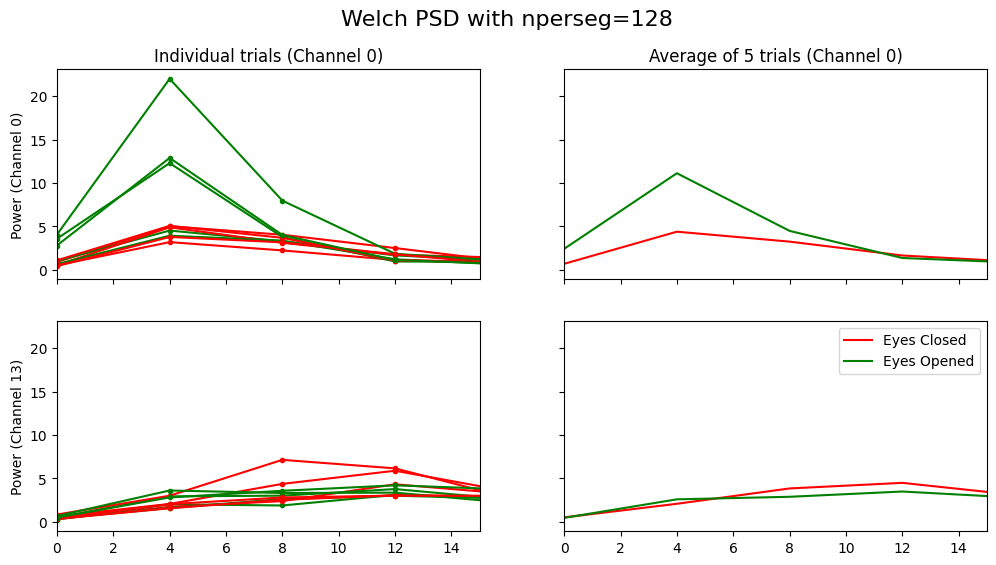

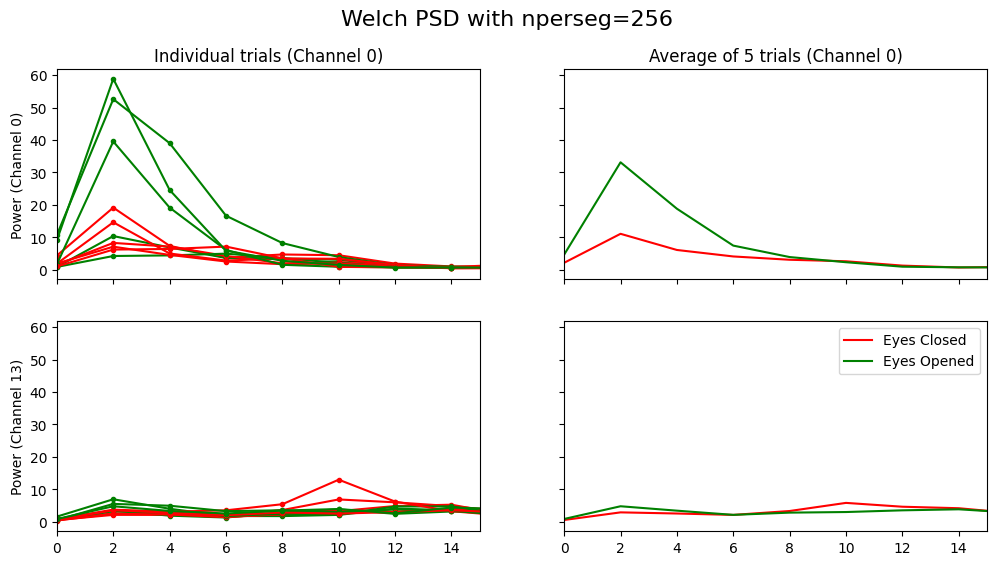

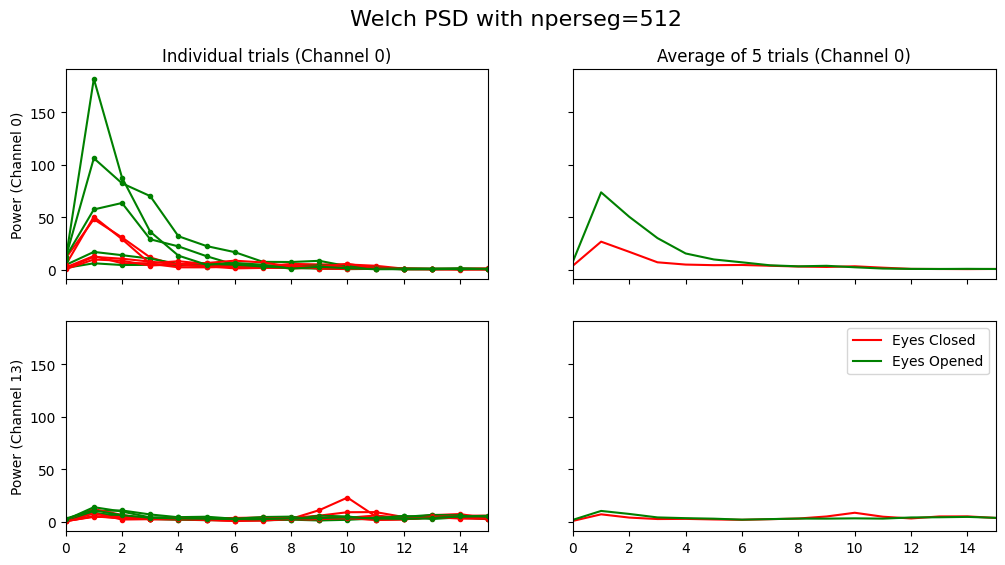

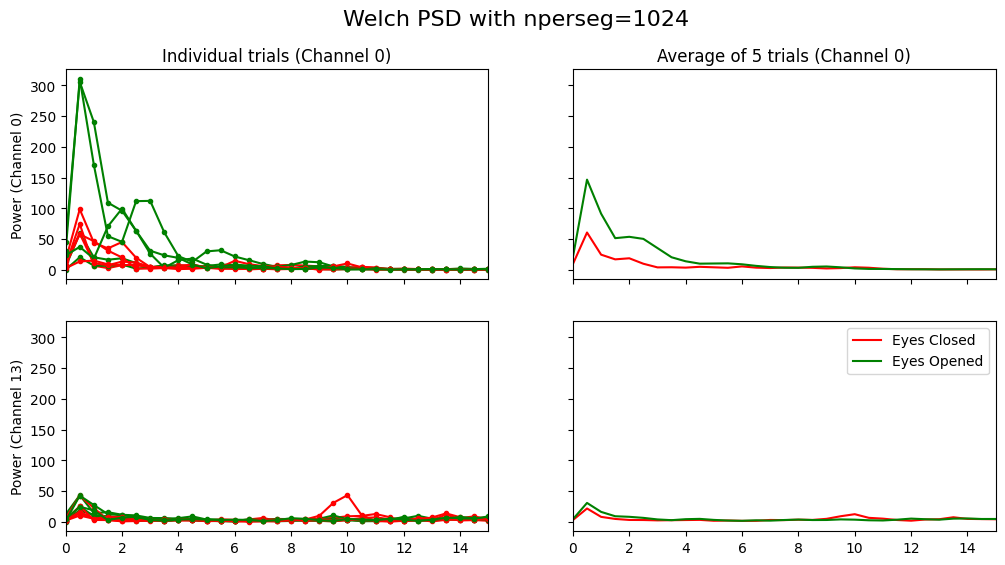

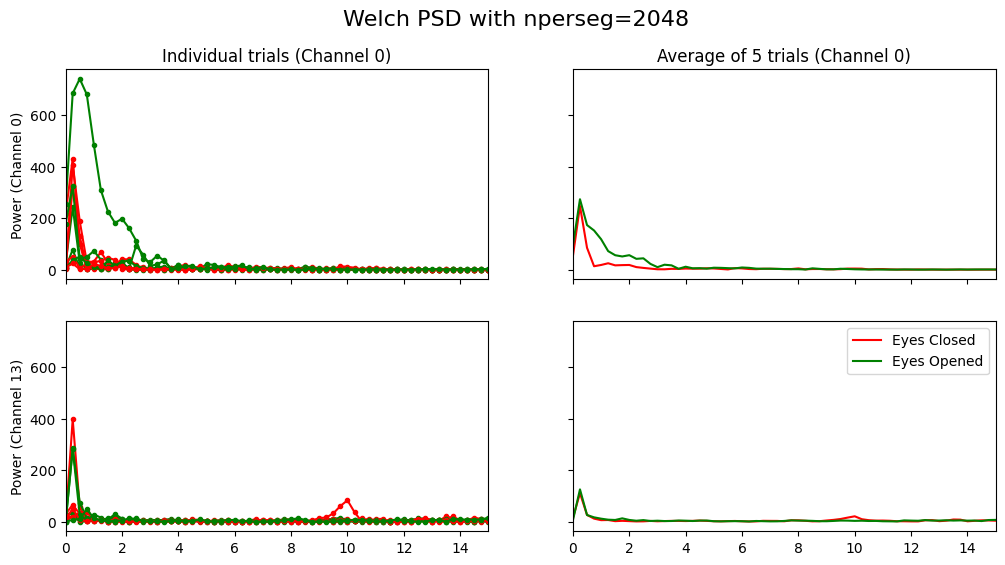

In [ ]:
### now find alpha frequency
eyes_closed_signals12 = []
eyes_opened_signals12 = []
window_indices12 = np.arange(4*fs) + 4*fs # Indices will be a vector of 4 s of samples start 4 s after index

for closed12 in eyes_closed_indices12:
    eyes_closed_signals12.append(eeg_data12[closed12 + window_indices12,:])

for opened12 in eyes_opened_indices12:
    eyes_opened_signals12.append(eeg_data12[opened12 + window_indices12,:])

# Try npserg values
nperseg_values = [64, 128, 256, 512, 1024, 2048]

# Loop for different nperseg values
for nperseg in nperseg_values:
    fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)
    fig.suptitle(f'Welch PSD with nperseg={nperseg}', fontsize=16)

    eyes_closed_Pxx12 = []
    eyes_opened_Pxx12 = []

# Calculate and plot the PSDs for channel 0
    for i in range(5):
        f12, Pxx12 = signal.welch(eyes_closed_signals12[i][:,0], fs, nperseg=nperseg)
        ax[0,0].plot(f12, Pxx12, 'r.-')
        eyes_closed_Pxx12.append(Pxx12)

        f12, Pxx12 = signal.welch(eyes_opened_signals12[i][:,0], fs, nperseg=nperseg)
        ax[0,0].plot(f12, Pxx12, 'g.-')
        eyes_opened_Pxx12.append(Pxx12)

    ax[0,1].plot(f12, np.mean(eyes_closed_Pxx12, axis=0), 'r', label='Eyes Closed')
    ax[0,1].plot(f12, np.mean(eyes_opened_Pxx12, axis=0), 'g', label='Eyes Opened')

# Reset for channel 13
    eyes_closed_Pxx12 = []
    eyes_opened_Pxx12 = []

# Calculate and plot the PSDs for channel 0
    for i in range(5):
        f12, Pxx12 = signal.welch(eyes_closed_signals12[i][:,13], fs, nperseg=nperseg)
        ax[1,0].plot(f12, Pxx12, 'r.-')
        eyes_closed_Pxx12.append(Pxx12)

        f12, Pxx12 = signal.welch(eyes_opened_signals12[i][:,13], fs, nperseg=nperseg)
        ax[1,0].plot(f12, Pxx12, 'g.-')
        eyes_opened_Pxx12.append(Pxx12)

    ax[1,1].plot(f12, np.mean(eyes_closed_Pxx12, axis=0), 'r', label='Eyes Closed')
    ax[1,1].plot(f12, np.mean(eyes_opened_Pxx12, axis=0), 'g', label='Eyes Opened')


    ax[0,0].set_title('Individual trials (Channel 0)')
    ax[0,1].set_title('Average of 5 trials (Channel 0)')
    ax[0,0].set_ylabel('Power (Channel 0)')
    ax[1,0].set_ylabel('Power (Channel 13)')
    ax[0,0].set_xlim(0,15)  # had to narrow frequency range
    ax[1,1].legend()


Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).
Using frequency 20.0 Hz (10 specified).


Text(0, 0.5, 'Power Ratio')

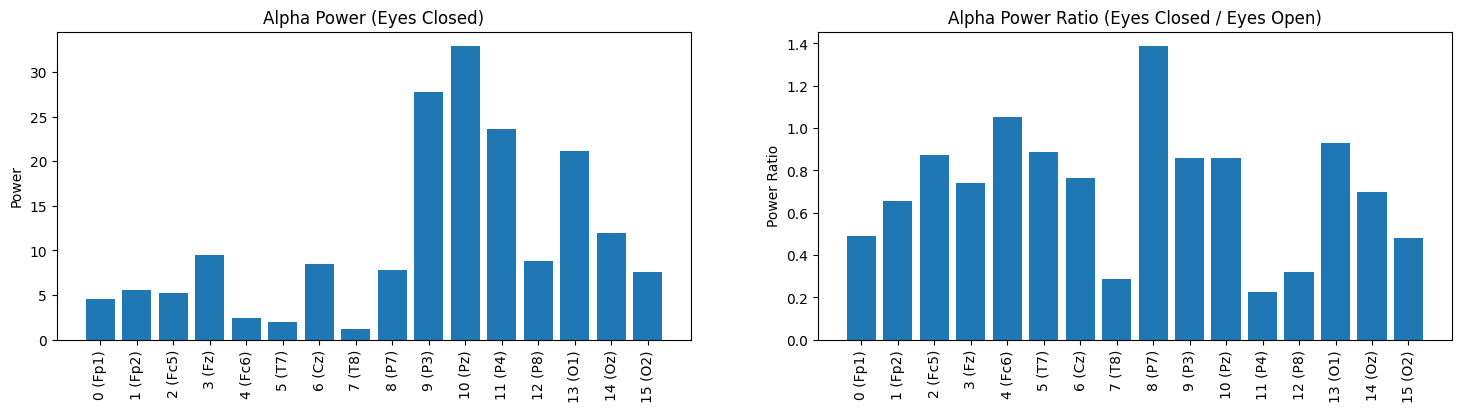

In [ ]:
def extract_alpha_power12(eeg_channel=0, frequency=10, nperseg=2048, window_size=4.0, window_offset=4.0):
    eyes_closed_signals12 = []
    eyes_opened_signals12 = []
    window_indices12 = np.arange(int(window_size*fs)) + int(window_offset*fs)

    for closed12 in eyes_closed_indices12:
        eyes_closed_signals12.append(eeg_data12[closed12 + window_indices, :])

    for opened12 in eyes_opened_indices8:
        eyes_opened_signals12.append(eeg_data12[opened12 + window_indices, :])

    f12, eyes_closed_Pxx12 = signal.welch(eyes_closed_signals12, fs, axis=1, nperseg=nperseg)
    f12, eyes_opened_Pxx12 = signal.welch(eyes_opened_signals12, fs, axis=1, nperseg=nperseg)

    fidx = np.abs(f12 - frequency).argmin()
    print('Using frequency {} Hz ({} specified).'.format(f[fidx], frequency))

    return np.mean(eyes_closed_Pxx12[:, fidx, eeg_channel], axis=0), np.mean(eyes_opened_Pxx12[:, fidx, eeg_channel], axis=0)

alpha_power12 = []
alpha_power_ratio12 = []

# Loop through all 16 EEG channels
for ch in range(16):
    eyes_closed_power12, eyes_opened_power12= extract_alpha_power12(eeg_channel=ch, frequency=10, nperseg=2048)
    alpha_power12.append(eyes_closed_power12)
    alpha_power_ratio12.append(eyes_closed_power12 / eyes_opened_power12)

# Plotting code
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_labels12 = ['{} ({})'.format(ind, lab) for ind, lab in enumerate(channel_labels12)]

# Plot Alpha Power (Eyes Closed)
ax[0].bar(plot_labels12, alpha_power12)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Alpha Power (Eyes Closed)')
ax[0].set_ylabel('Power')

# Plot Alpha Power Ratio (Eyes Closed to Eyes Open)
ax[1].bar(plot_labels12, alpha_power_ratio12)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Alpha Power Ratio (Eyes Closed / Eyes Open)')
ax[1].set_ylabel('Power Ratio')

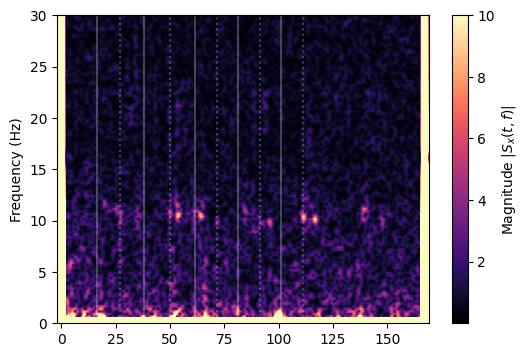

In [ ]:
#spectrogram

hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data12, axis=0)

fig, ax = plt.subplots(1,1,figsize=(6,4))
#use channel 10
im = ax.imshow((abs(stft[:,10,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data12.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")
ax.set_ylabel('Frequency (Hz)')
ax.set_ylim(0, 30)
[ax.axvline(t_eeg12[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
[ax.axvline(t_eeg12[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]


For subject 12, the alpha wave does not have a sweep similar to subject 6

Problem 3: Linear Filters

In [ ]:
b = signal.firls(numtaps=33, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)

Text(0, 0.5, 'Response of filter (dB)')

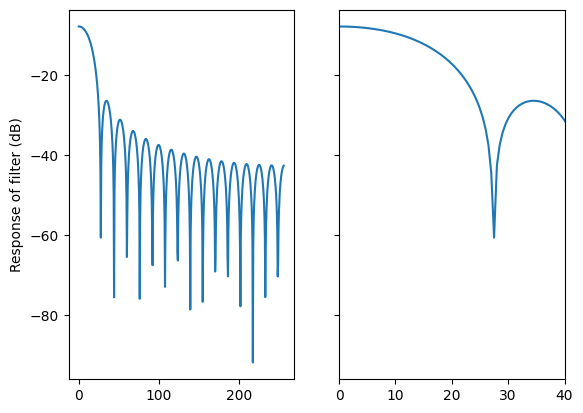

In [ ]:
f, response = signal.freqz(b, fs=fs) # Filter response is a complex number. We can ignore the phase for now.

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].plot(f, 20*np.log10(np.abs(response))) # 20*log10() creates a response in "dB"
ax[1].plot(f, 20*np.log10(np.abs(response)))
ax[1].set_xlim(0,40)
ax[0].set_ylabel('Response of filter (dB)')

Text(0, 0.5, 'Response of filter (dB)')

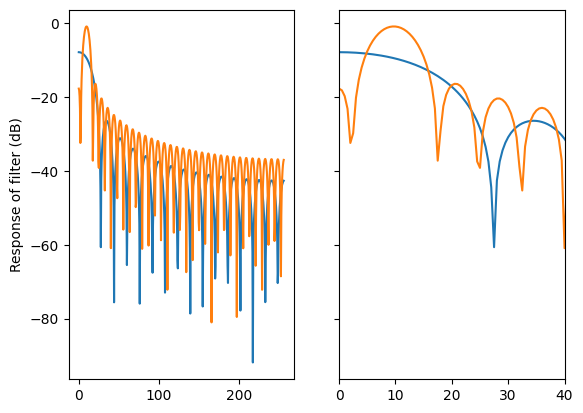

In [ ]:
b2 = signal.firls(numtaps=65, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)
f, response2 = signal.freqz(b2, fs=fs) # Filter response is a complex number. We can ignore the phase for now.

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].plot(f, 20*np.log10(np.abs(response))) # 20*log10() creates a response in "dB"
ax[0].plot(f, 20*np.log10(np.abs(response2))) # 20*log10() creates a response in "dB"
ax[1].plot(f, 20*np.log10(np.abs(response)))
ax[1].plot(f, 20*np.log10(np.abs(response2)))
ax[1].set_xlim(0,40)
ax[0].set_ylabel('Response of filter (dB)')

In [ ]:
alpha_data = signal.filtfilt(b2, 1, eeg_data, axis=0)


Text(0, 0.5, 'Channel 13 Signal')

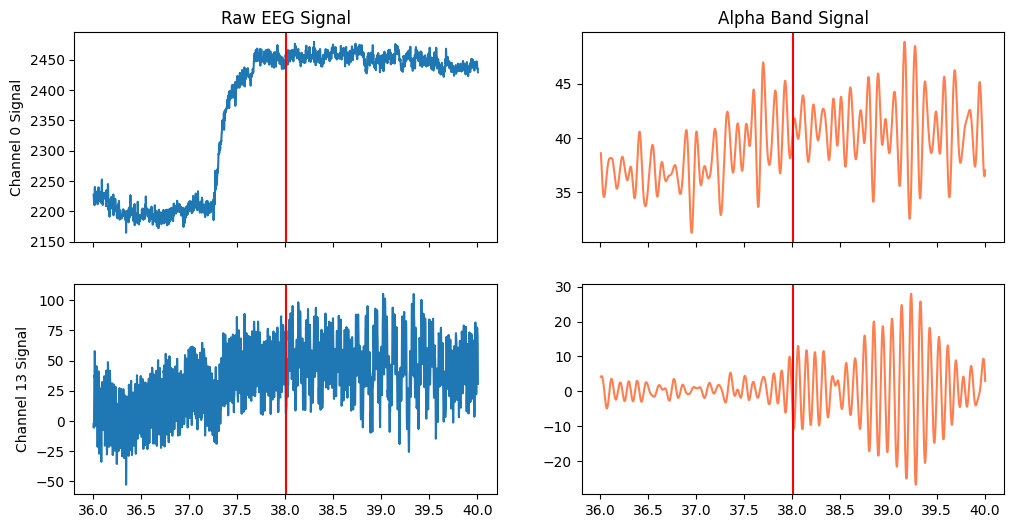

In [ ]:
closed_index = eyes_closed_indices[1,0] # Index of second eyes closing index

fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True)

ax[0,0].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 0])
ax[1,0].plot(t[closed_index - 1024: closed_index + 1024], eeg_data[closed_index - 1024: closed_index + 1024, 13])

ax[0,1].plot(t[closed_index - 1024: closed_index + 1024], alpha_data[closed_index - 1024: closed_index + 1024, 0], color='coral')
ax[1,1].plot(t[closed_index - 1024: closed_index + 1024], alpha_data[closed_index - 1024: closed_index + 1024, 13], color='coral')

[a.axvline(t[closed_index], color='r') for a in ax.flatten()]

ax[0,0].set_title('Raw EEG Signal')
ax[0,1].set_title('Alpha Band Signal')
ax[0,0].set_ylabel('Channel 0 Signal')
ax[1,0].set_ylabel('Channel 13 Signal')

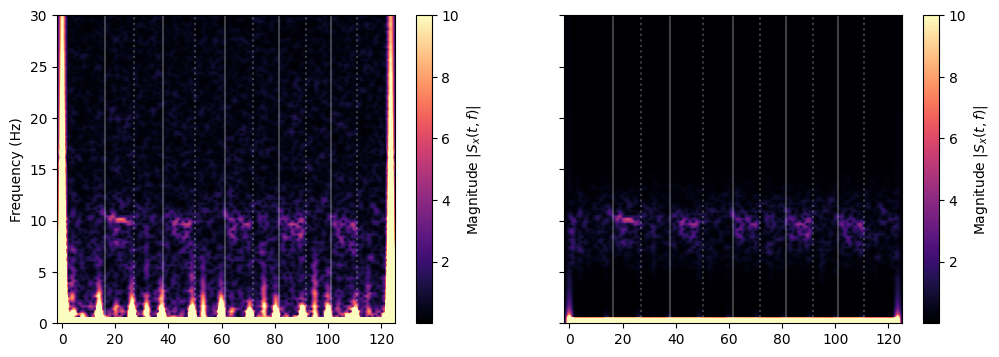

In [ ]:
hamm_win = signal.get_window('hamming', Nx=2048);
SFT = signal.ShortTimeFFT(hamm_win, hop=32, fs=fs, scale_to='psd') # 'psd` scaling affects how signal is normalized across frequency
stft = SFT.stft(eeg_data, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,4), sharey=True, sharex=True)
im = axs[0].imshow((abs(stft[:,0,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im, label="Magnitude $|S_x(t, f)|$")
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_ylim(0, 30)

stft2 = SFT.stft(alpha_data, axis=0)
im2 = axs[1].imshow((abs(stft2[:,0,:])), origin='lower', aspect='auto',
                 extent=SFT.extent(eeg_data.shape[0]), cmap='magma', vmax=10)
fig.colorbar(im2, label="Magnitude $|S_x(t, f)|$")


for ax in axs:
    [ax.axvline(t_eeg[idx], color='white', alpha=0.25) for idx in eyes_closed_indices]
    [ax.axvline(t_eeg[idx], linestyle=':', color='white', alpha=0.25) for idx in eyes_opened_indices]

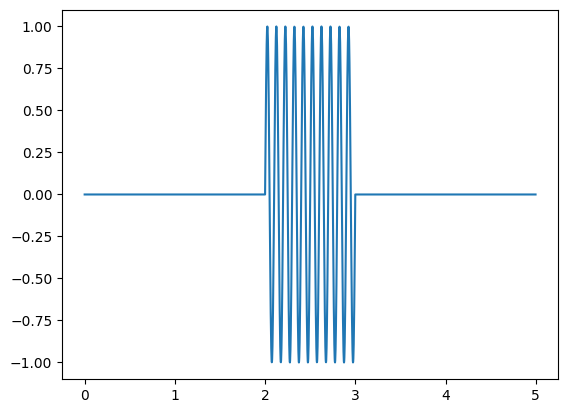

In [ ]:
fake_t = np.arange(5*fs)/fs
fake_alpha = np.zeros(fake_t.shape[0])
fake_alpha[2*fs:3*fs] = np.sin(2*np.pi*10*fake_t[2*fs:3*fs])
plt.plot(fake_t, fake_alpha)

Problem 3a: Filter smearing


Text(0.5, 1.0, 'Effect of Filter Smearing on Synthetic Alpha Signal')

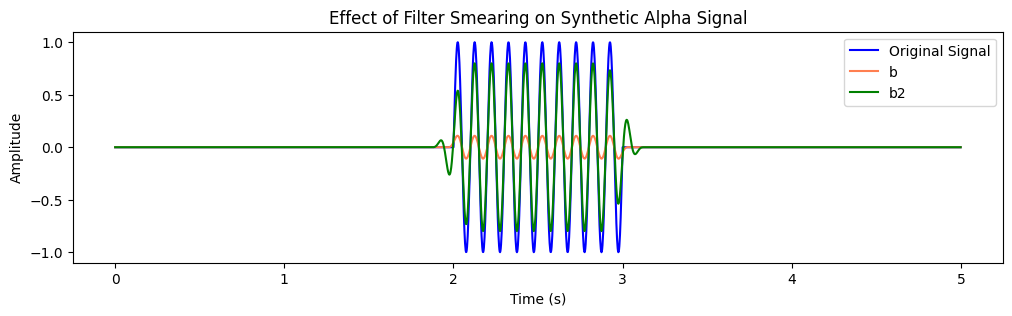

In [ ]:
#given
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(fake_t, fake_alpha, label='Original Signal', color='blue')

# Generate filtered versions of fake alpha signal and plot them
filtered_fake_alpha1 = signal.filtfilt(b, 1, fake_alpha)   # Filter with b (numtaps=33)
filtered_fake_alpha2 = signal.filtfilt(b2, 1, fake_alpha)  # Filter with b2 (numtaps=65)

# plot and label
ax.plot(fake_t, filtered_fake_alpha1, label='b ', color='coral')
ax.plot(fake_t, filtered_fake_alpha2, label='b2', color='green')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Effect of Filter Smearing on Synthetic Alpha Signal')


How far does the filtered alpha signal extend beyond its original bounds? (in cycles)
Filter b- does not extend outside its original bounds in any significant way, ~.2 cycles (.1 on each end).Filter b2 extends beyond its bounds in total about 2 cycles (one on each end).

Do you notice any distortion in the shape of the output signal?--
The output of both b and b2 are distorted with smaller amplitudes; b2 has the most significant disortion with an amplitude decreas from ~1 to ~.1 (b ~ .75)

Problem 3b: Filter design and smearing

Text(0.5, 1.0, 'Effect of Filter Smearing on Synthetic Alpha Signal')

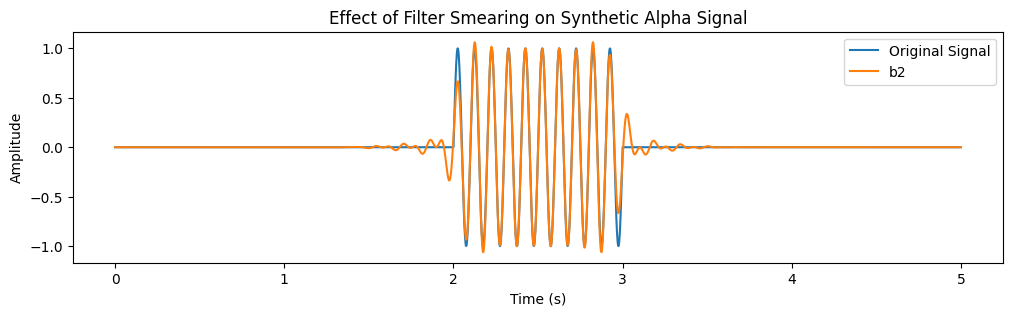

In [ ]:
b3= signal.firls(numtaps=513, bands=[0, 5, 7, 12, 14, 256], desired=[0, 0, 1, 1, 0, 0], fs=fs)

fake_t = np.arange(5*fs)/fs
fake_alpha = np.zeros(fake_t.shape[0])
fake_alpha[2*fs:3*fs] = np.sin(2*np.pi*10*fake_t[2*fs:3*fs])

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(fake_t, fake_alpha, label='Original Signal')

filtered_fake_alpha3 = signal.filtfilt(b3, 1, fake_alpha)  # Filter with b3 (numtaps=513)

# plot and label
ax.plot(fake_t, filtered_fake_alpha3, label='b2')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Effect of Filter Smearing on Synthetic Alpha Signal')


the most distortion begins in the last (outermost) cycle of the orginal signal.
How far does the filtered alpha signal extend beyond its original bounds? (in cycles)-- The filter extends about 10 cycles (peaks), .5 second on each side (ie., 5 cycles on each side)


Do you notice any distortion in the shape of the output signal?
The shape of the signal is not heavily distored until the outermost cycles, where the last cycle has lower amplidtude and then when it is extending past the orginal signal, it is distored with seemingly random, smaller amplitudes.